In [265]:
import numpy as np
import matplotlib.pyplot as plt

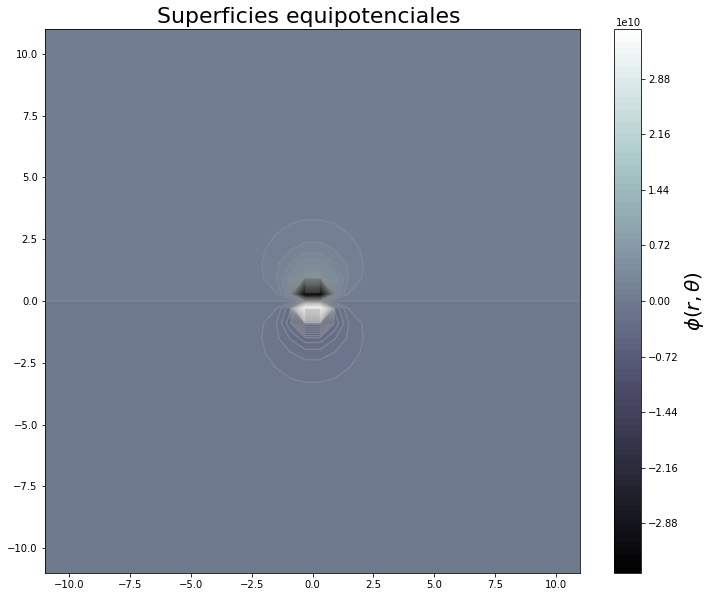

In [413]:
def rr(x,y):
    return np.sqrt(x**2+y**2)

def tt(x,y):
    if x==0:
        if y>0:
            return np.pi/2
        if y<0:
            return 3*np.pi/2
        if y==0:
            return 0
    if (x>0) & (y>=0):
        return np.arctan(y/x)
    if x<0:
        return np.arctan(y/x) + np.pi
    if (x>0) & (y<0):
        return np.arctan(y/x) +2*np.pi

V0 = 20
R = 10
P = 1
e0 = 8.854*10**-12

def phi_i(x,y):
    return (V0/R - P/(4*np.pi*e0*R**3))*rr(x,y)*np.cos(tt(x,y)) + 1/(4*np.pi*e0)*(P*np.cos(tt(x,y))/(rr(x,y)**2))

def phi_e(x,y):
    return np.cos(tt(x,y))*V0*R**2/(rr(x,y)**2)

t = 100
a = 30

xlist = np.linspace(-a, a, t)
ylist = np.linspace(-a, a, t)
X, Y = np.meshgrid(xlist, ylist)
Z = np.zeros((t,t))

for y in range(len(ylist)):
    for x in range(len(xlist)):
        if rr(xlist[x],ylist[y]) < R:
            Z[x,y] = phi_i(xlist[x],ylist[y])
        if rr(xlist[x],ylist[y]) >= R:
            Z[x,y] = phi_e(xlist[x],ylist[y])

l = 100
m = 1.1*R
            
plt.figure(figsize=(12,10))            
plt.contourf(X, Y, Z,levels=l,cmap="bone")
cbar = plt.colorbar()
cbar.set_label(r"$\phi(r,\theta)$", size=20)
plt.contour(X, Y, Z,levels=l,cmap="Greys",alpha=0.4)
plt.xlim(-m,m)
plt.ylim(-m,m)
plt.title("Superficies equipotenciales ", size=22)
plt.show()
#plt.savefig("se.png",bbox_inches="tight")

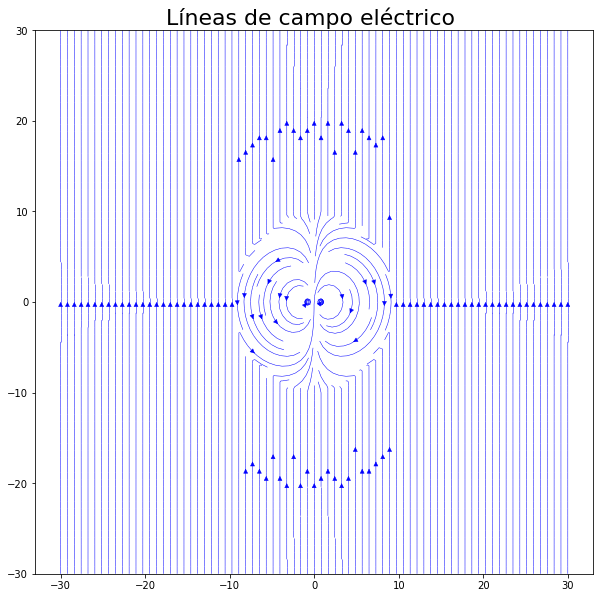

In [414]:
u = np.zeros((t,t))
v = np.zeros((t,t))

def re(x,y):
    return -(V0/R - P/(4*np.pi*e0))*np.cos(np.arctan(y/x)) + (1/(2*np.pi*e0))*(P*np.cos(np.arctan(y/x)))/(np.sqrt(x**2+y**2)**3)

def te(x,y):
    return (V0/R - P/(4*np.pi*e0))*np.sin(np.arctan(y/x)) +  (1/(4*np.pi*e0))*(P*np.sin(np.arctan(y/x)))/(np.sqrt(x**2+y**2)**3)

def ri(x,y):
    return (2*V0*R**2)/(np.sqrt(x**2+y**2)**3)*np.cos(np.arctan(y/x))

def ti(x,y):
    return (V0*R**2)/(np.sqrt(x**2+y**2)**2)*np.sin(np.arctan(y/x))
            

def ue(x,y):
    return re(x,y)*np.cos(np.arctan(y/x)) - te(x,y)*np.sin(np.arctan(y/x))

def ve(x,y):
    return re(x,y)*np.sin(np.arctan(y/x)) + te(x,y)*np.cos(np.arctan(y/x))

def ui(x,y):
    return ri(x,y)*np.cos(np.arctan(y/x)) - ti(x,y)*np.sin(np.arctan(y/x))

def vi(x,y):
    return ri(x,y)*np.sin(np.arctan(y/x)) + ti(x,y)*np.cos(np.arctan(y/x))

for y in range(len(ylist)):
    for x in range(len(xlist)):
        if rr(xlist[x],ylist[y]) < R:
            u[x,y] = vi(xlist[x],ylist[y])
        if rr(xlist[x],ylist[y]) >= R:
            u[x,y] = ve(xlist[x],ylist[y])
            
for y in range(len(ylist)):
    for x in range(len(xlist)):
        if rr(xlist[x],ylist[y]) < R:
            v[x,y] = ui(xlist[x],ylist[y])
        if rr(xlist[x],ylist[y]) >= R:
            v[x,y] = ue(xlist[x],ylist[y])
            
plt.figure(figsize=(10, 10)) 
plt.streamplot(X, Y, u, v, color='b',density=2.5, linewidth=0.5)
plt.title("Líneas de campo eléctrico ", size=22)
plt.show()
#plt.savefig("lc.png",bbox_inches="tight")